<a href="https://colab.research.google.com/github/juliogdomingues/icd_ufmg/blob/main/Lista%2004%20-%20Bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import scipy.stats as ss


np.random.seed(30091985)

plt.rcParams["figure.figsize"] = (10, 8)
plt.ion();

# Lista 4 - ICs e Bootstrap

## Intervalos de Confiança

Intervalos de confiança são intervalos calculados a partir de observações que podem variar de amostra para amostra e que com dada frequência (nível de confiança) inclui o parâmetro de interesse real não observável.

**Por exemplo:** Um intervalo com nível de confiança de 99% para a média de uma variável aleatória significa que ao calcularmos *n* intervalos de confiança tomando como base *n* amostras aleatórias, espera-se que 99% dos intervalos construídos contenham o valor real do parâmetro (média).

Em outras palavras, o nível de confiança seria a proporção de intervalos de confiança construídos em experimentos separados da mesma população e com o mesmo procedimento que contém o parâmetro de interesse real.

Foram ministradas duas maneiras de construírmos intervalos de confiança:

- Probabilisticamente direto dos dados (Forma clássica).
- Via sub-amostragem com reposição (*Bootstrap*).

Para o primeiro caso, lembrando do conceito visto em aula, temos (para um IC com 95% de confiança):

$$\begin{align}
0.95 = P(-z \le Z \le z)=P \left(-1.96 \le \frac {\bar X-\mu}{\sigma/\sqrt{n}} \le 1.96 \right) = P \left( \bar X - 1.96 \frac \sigma {\sqrt{n}} \le \mu \le \bar X + 1.96 \frac \sigma {\sqrt{n}}\right).
\end{align}$$

Vamos colocar na prática!

## Exemplo Inicial

Vamos começar construindo um intervalo de confiança pra a média de uma distribuição Normal (Gaussiana) com média $\mu = 0$ e variância $\sigma² = 1$.

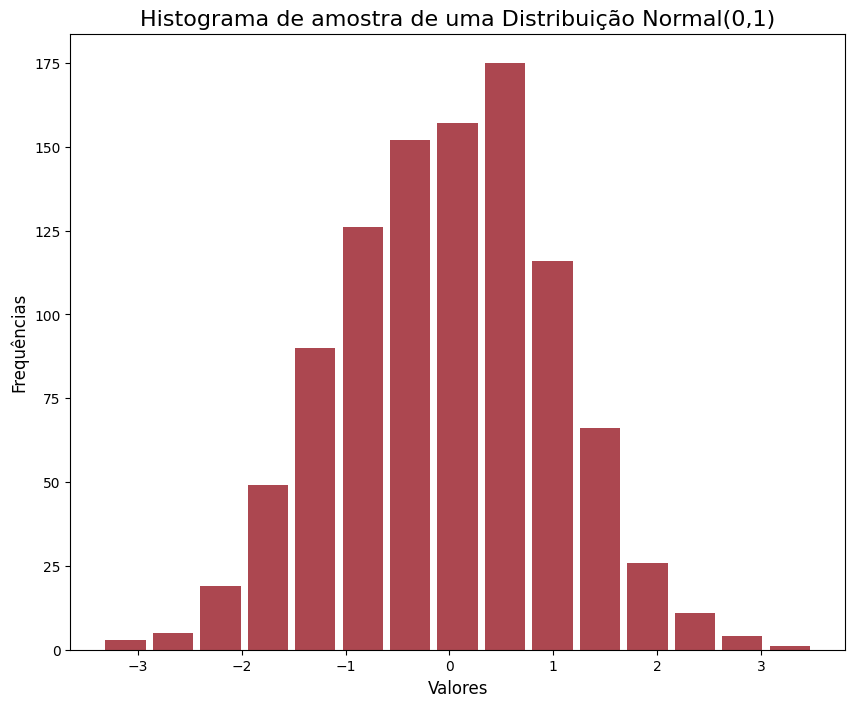

INTERVALO DE CONFIANCA (manual) = [-0.0833, 0.0439]
INTERVALO DE CONFIANCA (com scipy)= [-0.0833, 0.0439]


In [2]:
def confidence_interval(loc, scale, alpha=0.99):
    """
    Essa função cria uma distribuição Normal com base nos
    parâmetros fornecidos e constrói um intervalo de confiança para sua média.

    Parameters:
    -----------
    loc (float): Média da distribuição desejada.
    scale (float): Desvio padrão da distribuição desejada.
    alpha (float): Nível de confiança do intervalo. Deve ser um valor entre 0 e 1. Default = 0.99, o que corresponde a 99% de confiança.

    Returns:
    -----------
    X (array): Dados gerados segundo uma distribuição Normal(0,1).
    LI (float): Limite inferior do intervalo calculado.
    LS (float): Limite superior do intervalo calculado.

    """

    # Gerando amostra de uma Normal(média,std) de tamanho N
    N = 1000
    X = np.random.normal(loc=loc, scale=scale, size=N)

    # Criando plot da amostra gerada
    plt.xlabel('Valores', fontsize=12)
    plt.ylabel('Frequências', fontsize=12)
    plt.title('Histograma de amostra de uma Distribuição Normal(0,1)', fontsize=16)

    plt.hist(X, color='#A3333D', alpha=0.9, rwidth=0.85, bins=15)
    plt.show()

    # Calculando intervalo de  95% de confiança para a média manualmente
    LI = X.mean() - 1.96 * (X.std(ddof=1) / np.sqrt(N)) # LI = limite inferior
    LS = X.mean() + 1.96 * (X.std(ddof=1) / np.sqrt(N)) # LS = limite superior
    print("INTERVALO DE CONFIANCA (manual) = [{:.4f}, {:.4f}]".format(LI, LS))

    # Utilizando o valor da confiança como base, utilizamos o pacote scipy.stats
    LI = X.mean() - ss.norm.ppf(alpha+(1-alpha)/2).round(2) * (X.std(ddof=1) / np.sqrt(N))
    LS = X.mean() + ss.norm.ppf(alpha+(1-alpha)/2).round(2) * (X.std(ddof=1) / np.sqrt(N))

    # Printando intervalo de confiança
    print("INTERVALO DE CONFIANCA (com scipy)= [{:.4f}, {:.4f}]".format(LI, LS))

    return X, LI, LS

X, LI, LS = confidence_interval(loc=0, scale=1, alpha=0.95)

Podemos afirmar que, se pudermos repetir muitas vezes o experimento e coletarmos os dados, aproximadamente em 95% das vezes a média populacional estará no intervalo encontrado.

**Algumas observações interessantes. Note que:**
- A cada vez que executamos o código acima, tanto os intervalos como o histograma dos dados são diferentes. Estamos realizando uma amostra de uma distribuição.
- A medida que o tamanho da amostra (N) cresce, o tamanho do intervalo - para um mesmo nível de confiança - cai. Isso ocorre pois com mais dados temos uma maior certeza de que os valores encontrados de fato representam a população de interesse.
- Os valores dos intervalos de confiança (manual e scipy) só coincidem quando *alpha=0.95*. Essa é a vantagem de se utilizar o pacote. Para valores diferentes de 0.95, deve-se consultar o valor correspondente na distribuição Z.

## Dados ENEM 2015.

Nos exercícios dessa seção vamos trabalhar com os dados do [ENEM 2015](https://raw.githubusercontent.com/pedroharaujo/ICD_Docencia/master/enem2015.csv).

Importando pandas e carregando dados.

In [3]:
import pandas as pd

url = 'https://github.com/icd-ufmg/icd-ufmg.github.io/raw/master/listas/l4/enem2015.csv'
data = pd.read_csv(url)

Primeiras visualizações do banco de dados do ENEM 2015.

In [4]:
data.head()

,DEPENDENCIA_ADMINISTRATIVA,NOTA_MEDIA_ESCOLA,TAXA_DE_APROVACAO,TAXA_DE_PARTICIPACAO
0,Federal,659.258362,92.2,96.894409
1,Federal,637.646728,86.5,98.717949
2,Estadual,556.710632,82.5,74.603180
3,Estadual,542.865967,70.2,54.651165
4,Estadual,557.379150,67.0,64.864861


In [5]:
data.describe()

,NOTA_MEDIA_ESCOLA,TAXA_DE_APROVACAO,TAXA_DE_PARTICIPACAO
count,1685.000000,1683.000000,1685.000000
mean,575.391745,86.044444,75.263669
std,40.796223,10.334011,16.886193
min,487.007141,47.700000,50.000000
25%,544.937500,79.500000,59.615387
50%,561.520752,87.800000,72.916672
75%,607.530579,94.550000,92.857140
max,713.629028,100.000000,100.000000


## Exercício 01

Altere a função a baixo para retornar o intervalo de confiança para a média da variável 'NOTA_MEDIA_ESCOLA' para escolas com 'DEPENDENCIA_ADMINISTRATIVA' == Estadual.

Nível de confiança: 99%

**Lembrete**: será necessário aplicar os conhecimentos de pandas do módulo anterior para filtrar o DataFrame selecionando apenas os casos de interesse.

In [69]:
CI = 0.99
cauda = CI + (1-CI)/2

def CI(data):
    escolas_estaduais = data[data['DEPENDENCIA_ADMINISTRATIVA'] == 'Estadual'].dropna(subset=['NOTA_MEDIA_ESCOLA'])
    media_notas = escolas_estaduais['NOTA_MEDIA_ESCOLA'].mean()
    desvio_notas = escolas_estaduais['NOTA_MEDIA_ESCOLA'].std()
    n = escolas_estaduais['NOTA_MEDIA_ESCOLA'].count()

    z_score = ss.norm.ppf(cauda) # Z-score para cauda superior de 99% CI
    margem_erro = z_score * (desvio_notas / np.sqrt(n))

    li = media_notas - margem_erro
    ls = media_notas + margem_erro

    return li, ls

Carregando os módulos de testes!

In [70]:
from numpy.testing import assert_almost_equal
from numpy.testing import assert_equal

from numpy.testing import assert_array_almost_equal
from numpy.testing import assert_array_equal

Nosso teste

In [71]:
(LI, LS) = CI(data)

assert_equal(548.13, LI.round(2))
assert_equal(551.09, LS.round(2))

## Exercício 02 (Sem correção automática)

Plote uma CDF da coluna 'TAXA_DE_APROVACAO'.

**Use o statsmodels e crie um objeto `ecdf = ECDF(...)`.**


Esta tarefa não tem correção automática, use o gráfico abaixo para saber se acertou ou não.

![](https://github.com/pedroharaujo/ICD_Docencia/blob/master/ECDF.png?raw=true)

In [72]:
# codigo para importar a função ECDF
from statsmodels.distributions.empirical_distribution import ECDF

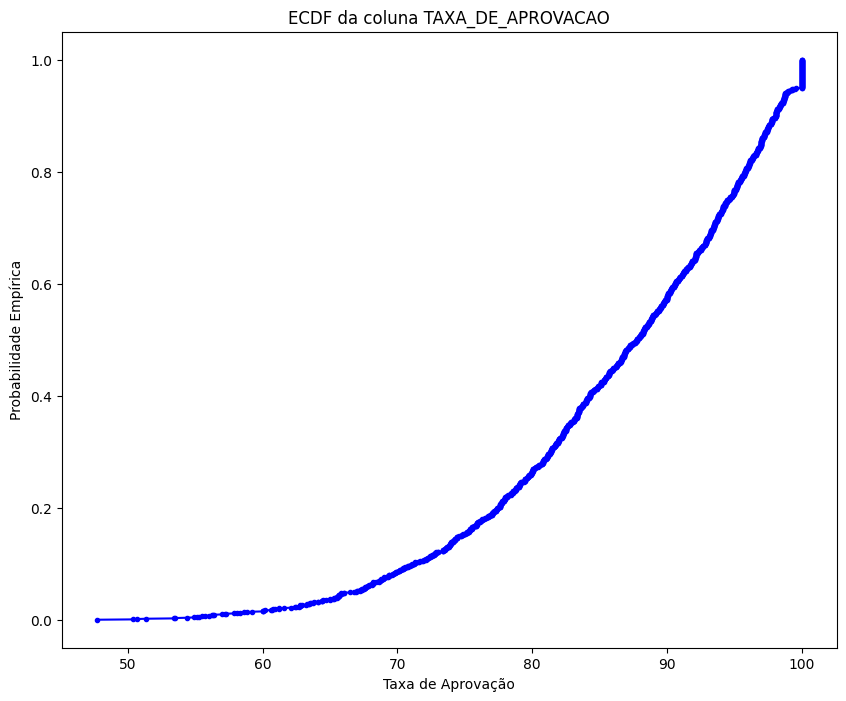

In [73]:
ecdf = ECDF(data['TAXA_DE_APROVACAO'].dropna())  # Usando dropna() para remover valores NaN

# Plote a ECDF
plt.plot(ecdf.x, ecdf.y, linestyle='-', marker='.', color='blue')
plt.title('ECDF da coluna TAXA_DE_APROVACAO')
plt.xlabel('Taxa de Aprovação')
plt.ylabel('Probabilidade Empírica')
plt.show()

## Bootstrap

Quando falamos em bootstrap deve-se ter em mente que estamos falando de amostragem com reposição.

De maneira simplista, utilizamos bootstrap quando queremos construir um intervalo de confiança para uma variável e dispomos de poucos dados. Ao realizarmos várias sub-amostras **com reposição**, a lei dos grandes números nos garante que estamos aproximando a população de interesse.

Note o destaque para o termo com reposição. É CRUCIAL que as sub-amostras sejam feitas com reposição. Só assim garantimos a aleatoriedade!

Veja o exemplo abaixo.

In [74]:
col = 'TAXA_DE_PARTICIPACAO'
n_sub = 10000 #numero de sub-amostras
size = len(data) #tamanho do dataframe
values = np.zeros(n_sub)

def bootstrap(n_sub, size, col):
    for i in range(n_sub):
        sample = data.sample(size, replace=True)

        # Lembre que podemos utilizar mediana, média ou qualquer outra estatística agregada
        # values[i] = sample[col].median()
        values[i] = sample[col].mean()

    # Gerando valores inferior e superior para um nível de confiança de 95%
    LI = np.percentile(values, 2.5)
    LS = np.percentile(values, 97.5)
    return values, LI, LS

values, LI, LS = bootstrap(n_sub, size, col)
print('Intervalo de Confianca: [{}, {}]'.format(LI.round(4), LS.round(4)))

Intervalo de Confianca: [74.4643, 76.0851]


## Exercício 03

Realizando um groupy pela coluna 'DEPENDENCIA_ADMINISTRATIVA' conseguimos observar para quais casos vale a pena utilizarmos bootstrap.

In [75]:
data.groupby('DEPENDENCIA_ADMINISTRATIVA').count()

,NOTA_MEDIA_ESCOLA,TAXA_DE_APROVACAO,TAXA_DE_PARTICIPACAO
DEPENDENCIA_ADMINISTRATIVA,,,
Estadual,1054,1054,1054
Federal,43,42,43
Municipal,22,22,22
Privada,566,565,566


**A)** Intervalos de confiança exatos são úteis quando temos pelo menos uns 50 pontos. Na função abaixo, retorne o número da opção que indica para quais 'DEPENDENCIAS_ADMINISTRATIVAS' é aconselhado utilizar Bootstrap para construção do intervalo de confiança:

- 1) Estadual e Federal.
- 2) Estadual e Municipal.
- 3) Estadual e Privada.
- 4) Federal e Municipal.
- 5) Federal e Privada.
- 6) Municipal e Privada.

In [76]:
def resposta():
    # Escolha uma das opções acima
    # return 1 ou 2 ou 3 ou 4 ou 5 ou 6
    # Escreva sua resposta abaixo:
    # YOUR CODE HERE
    return 4

**B)** Construa um intervalo de confiança via Bootstrap para a média da variável 'NOTA_MEDIA_ESCOLA' para escolas de 'DEPENDENCIA_ADMINISTRATIVA' **Federal**. Você deve utilizar 5000 amostras e nível de confiança de 90%.

In [77]:
for i in range(5000):
    d_novo = data.sample(n=len(data), replace=True)
    d_novo.query('DEPENDENCIA_ADMINISTRATIVA == "Federal"').NOTA_MEDIA_ESCOLA.mean()

In [78]:
def bootstrap_mean(n_sub, alpha):
    escolas_federais = data[data['DEPENDENCIA_ADMINISTRATIVA'] == 'Federal']
    notas = escolas_federais['NOTA_MEDIA_ESCOLA'].dropna().astype(float)

    bootstrap_means = []

    for _ in range(n_sub):
        sample = np.random.choice(notas, size=len(notas), replace=True)
        bootstrap_means.append(np.mean(sample))

    # Calcular os limites do intervalo de confiança
    LI = np.percentile(bootstrap_means, (1 - alpha) / 2 * 100)
    LS = np.percentile(bootstrap_means, (1 + alpha) / 2 * 100)

    return bootstrap_means, (LI, LS)

In [79]:
values, (LI, LS) = bootstrap_mean(n_sub=5000, alpha=0.9)
assert LI.round() == 620 or LI.round() == 621 or LI.round() == 622
assert LS.round() == 634 or LS.round() == 635 or LS.round() == 636